<a href="https://colab.research.google.com/github/AlexParreira/AlexParreira_Data_Science/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Titanic

  Com certeza, todo o mundo já ouviu falar ou assistiu ao tão aclamado filme Titanic, que conta a história do *navio transatlântico mais moderno do planeta* lá naqueles tempos. O mesmo que levará um total de 2224 pessoas de Southampton, Reino Unido a Nova Iorque fazendo as suas paradas por Cherbourg-Octeville na França e em Queenstown na Irlanda. Infelizmente em 15 de abril de 1912 ele colidiu com um iceberg, o seu naufrágio matou 1502 pessoas.

Neste momento de crise foram descobertas várias falhas no projeto como: falta de botes salva-vidas suficiente para todos, além de muitas ações irresponsáveis por parte da tripulação.


---


# 1. Definição do Problema


A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle Titanic: <a href ="https://www.kaggle.com/c/titanic">Machine Learning from Disaster.</a>

### Objetivo
Espera-se no desafio que se consiga fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência e após analisar os dados, que você seja capaz de construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.


# 2. Obtenção dos Dados


Os dados disponibilizados pelo Kaggle foram divididos em dois grupos:

* Dataset de treino (train.csv)
    * Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não.
    * Composto por diversas features como gênero do passageiro e classe do embarque.

* Dataset de Teste (test.csv)
    * Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.

In [0]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Permite a visualização de todas as colunas
pd.options.display.max_columns = None

# Renderiza os gráficos direto no notebook
%matplotlib inline

In [0]:
# montando um drive no Colab
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/data/test.csv')

In [0]:
# Verifica as Dimensões do DataFrame
print('Variáveis:\t{}\nEntradas:\t{}'.format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


# 3.Explorando dados


Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores NaN, presença de caracteres e tipo de distribuição.
* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre
  * 0 = Não
  * 1 = Sim
* Pclass: Classe do bilhete
  * 1 = 1ª Classe
  * 2 = 2ª Classe
  * 3 = 3ª Classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da Passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto no qual o passageiro embarcou
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton
Q1. Quais os tipos de cada variável?

* Variáveis Numéricas
  * Discretas
    * Pclass
    * SibSp
    * Parch
  * Contínuas
    * Age
    * Fare
  * Alvo
    * Survived
  * Chave Primária
    * PassengerId
  * Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [0]:
# Identifica o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Ver a porcentagem valores faltantes
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

A variável sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a variável **Age** não possui valor em quase 20% dos passageiros. Por fim, a variável informando **Embarked** possui apenas 2% de informações faltantes.

In [0]:
# Distribuição estatística dos dados?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaec39c710>,
      dtype=object)

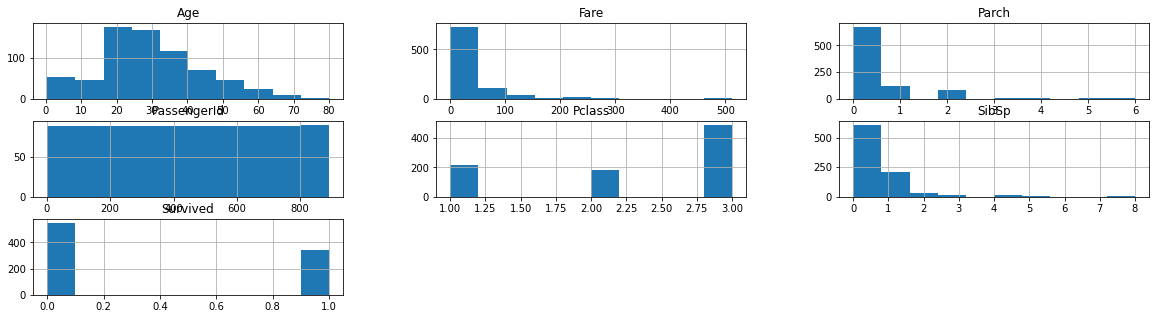

In [0]:
# Histograma das variáveis numéricas.
train.hist(figsize=(20,5))

In [0]:
# analizando a probabilidade de sobrevivência por sexo
train[['Sex','Survived']].groupby(['Sex']).mean()



,Survived
Sex,
female,0.742038
male,0.188908


In [0]:
# analizando a probabilidade de sobrevivência por classe social
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [0]:
# analizando a probabilidade de sobrevivência por local de embarque
train[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [0]:
# analizando a probabilidade de sobrevivência por sexo e classe social
train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

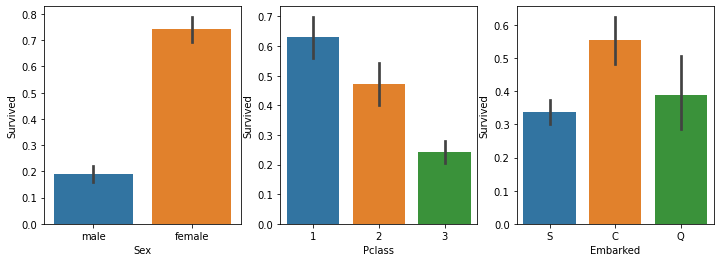

In [0]:
# Platar as gráficos para Suvived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

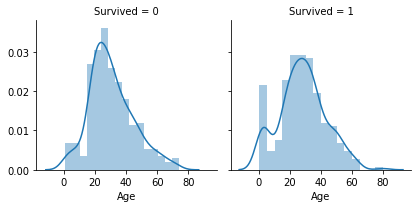

In [0]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaec7efbe0>,
      dtype=object)

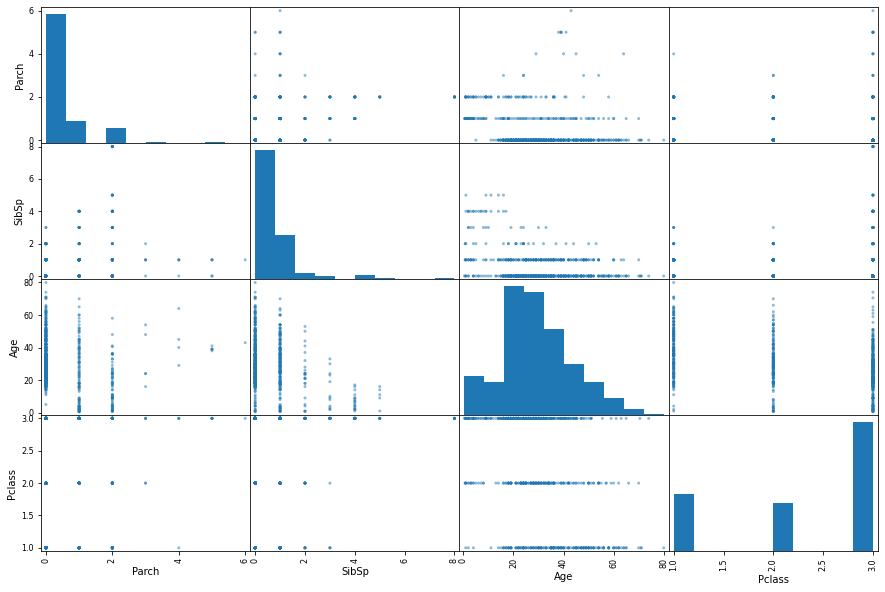

In [0]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age','Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10))

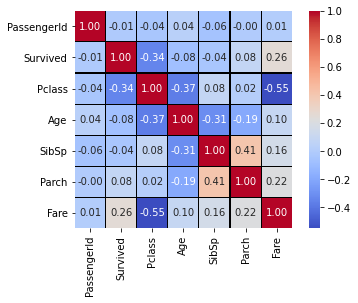

In [0]:
# plando um heatmap para as variáveis numéricas

sns.heatmap(train.corr(), cmap='coolwarm',fmt='.2f', linewidths=0.1,vmax=1.0, square = True, linecolor='black',annot=True);

In [0]:
# descrição estatística em coluas com describe
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hold, Mr. Stephen",male,347082,B96 B98,S
freq,1,577,7,4,644


Podemos ver que:
* Os valores para Name são únicos, um para cada pessoa;
* Não há missing values para Name e Sex;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior * frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

# 4. Preparando os Dados


In [0]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [0]:
# desconsiderando dados irrelevantes para o treinamento
df_merged.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1, inplace=True)


### Trantando valore Vazios

In [0]:
# valores faltantes
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [0]:
# Variáveis 'Age' e 'Fare' receberá média dos mesmos
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# Embarked receberá o valor com maior frequência
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### Preparando Variáveis pro modelo

In [0]:
# converte 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male':0,'female':1})

#dummie variáveis para 'Embarked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked',axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [0]:
#recuperando datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx]

# 5. Construção do Modelo e Avaliação

In [0]:
# importando as bibliotecas do modelo de Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier

### Regressão Logística

In [0]:
# modelo
lr_model = LogisticRegression(solver = 'liblinear')
lr_model.fit(train, target)

acc_logReg = round(lr_model.score(train, target) * 100,0)
print('Acurácia do modelo de Regressão Logística: {}'.format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.0


In [0]:
#criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verifica a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print('Acurácia do modelo de Árvore de Descisão: {}'.format(acc_tree))

Acurácia do modelo de Árvore de Descisão: 82.72


### Final - Eu sobreviveria ao Titanic

In [0]:
# declando valores das variáveis para mim e minha esposa
Alex = np.array([2, 0, 30, 1, 1, 32.2,0 ,0 ,0, 1]).reshape((1,-1))
bianca = np.array([2, 1, 24, 1, 1, 32.2,0 ,0 ,0, 1]).reshape((1,-1))

#verificando se nós teríamos sobrevivido
print("Alexander:\t{}".format(tree_model.predict(Alex)[0]))
print("Bianca:\t{}".format(tree_model.predict(bianca)[0]))

Alexander:	0
Bianca:	1
